<a href="https://colab.research.google.com/github/jzaragosa06/psei-analysis/blob/main/Market_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock & Index Correlation Analysis
In the world of finance and investing, understanding the relationship between individual stocks and market indices or between two disparate stocks is important for making informed decision. In this project, we will analyze the correlation between stock and a market index as welll as the correlation between two stock using Python.

Using Python's package management system, pip, we can import the 'yfinance' package. This module provides easy access to financial data from Yahoo Finance. It allows us to download historical market data, such as as stock prices, financial metrics, etc., directly in our Python script.

In [ ]:
!pip install yfinance

## Correlation Analysis Between Stock Price and Market Index

In correlation analysis between stock price and a market index, we aim to quantify the degree to which their price movements are related. A high positive correlation indicates that the stock's performance closely follows the overall market trends, while low or negative correlation suggest that the stock's movements are more independendt of market trends.

The calculation primarily involves:

*   calculating daily returns as percentage, and
*   calculating the correlation coefficient

In this case, we are analyzing the correlation of Apple stock prices and S&P 500 index between January 1, 2020 and June 26, 2024. This index is a measure for tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. Additionally, we are using the adjusted closing price instead of closing price to calculate the correlation. The adjusted closing price is the stock's closing price adjusted for corporate actions such as dividends, stock splits, and new stock offerings.







In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

stock_symbol = 'AAPL'
index_symbol = '^GSPC'

# Download data from Yahoo Finance
stock_data = yf.download(stock_symbol, start='2020-01-01', end='2024-06-26')
index_data = yf.download(index_symbol, start='2020-01-01', end='2024-06-26')

# Align data by date
aligned_data = stock_data['Adj Close'].to_frame().join(index_data['Adj Close'], how='inner', lsuffix='_stock', rsuffix='_index')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Prior to the calculation of correlation between the stock prices and index, we need to calculate the daily percentage return for stock and index.  This step standardize the data, allowing us to compare relative movements of the stock and index on common scale. Also, this step eliminates non-stationarity, making the data more suitable for statistical analysis like correlation and forecasting.

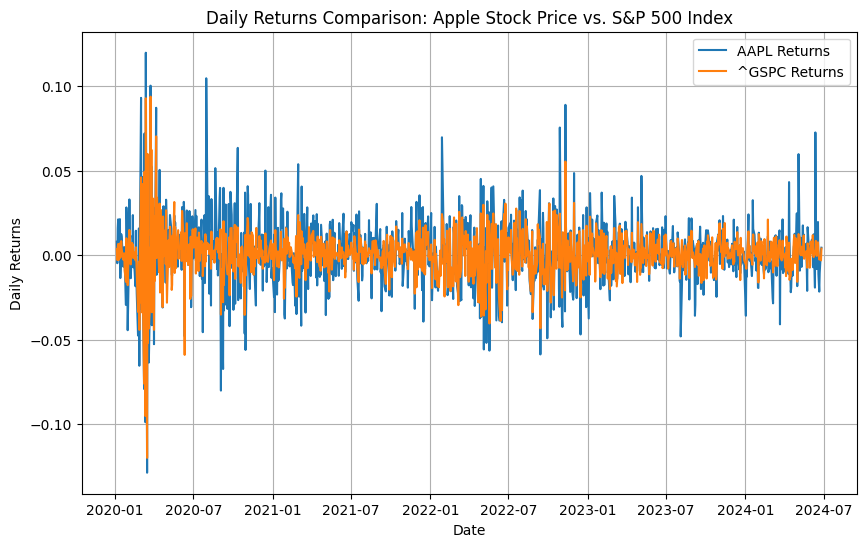

Correlation between AAPL and ^GSPC: 0.7987060257468187


In [7]:
# Calculate daily returns
#this calculates the daily returns(diff) in percentage.
aligned_data['stock_returns'] = aligned_data['Adj Close_stock'].pct_change()
aligned_data['index_returns'] = aligned_data['Adj Close_index'].pct_change()


# Calculate daily returns
#while this calculates the daily return just a difference.
# aligned_data['stock_returns'] = aligned_data['Adj Close_stock'].diff()
# aligned_data['index_returns'] = aligned_data['Adj Close_index'].diff()
# Drop NaN values
aligned_data = aligned_data.dropna()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(aligned_data.index, aligned_data['stock_returns'], label=f'{stock_symbol} Returns')
plt.plot(aligned_data.index, aligned_data['index_returns'], label=f'{index_symbol} Returns')
plt.title(f'Daily Returns Comparison: Apple Stock Price vs. S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Compute the correlation coefficient
correlation = aligned_data['stock_returns'].corr(aligned_data['index_returns'])
print(f"Correlation between {stock_symbol} and {index_symbol}: {correlation}")


Based on the result, the correlation is 0.798706. This indicates a strong possitive relationship, suggesting that the stock's price movements closely follow the index trend.

Given the strong positive correlation, the stock's performance is significantly influenced by the movements of the index. Investors can expect the given stock to follow the general trend of the index, which is useful for making predictions and understanding market behavior.

Additionally, strong positive correlation between stock prices and index implies that holding both stock and index in portfolio, i.e. via index fund, might not provide diversification benefit. This is because risk in either one of them affects the other. https://www.investopedia.com/terms/c/correlation.asp. Diversification in stocks is the strategy of spreading investments across various stocks or asset classes to reduce risk and minimize the impact of any single asset's poor performance on the overall portfolio.

## Correlation Analysis Between Two Stocks
In correlation analysis between two stocks, we aim to quantify the degree to which their price movements are related. This analysis is done for the following reasons:


*   Using correlation, investors can make informed decisions about portfolio diversification. Stocks with low or negative correlation can help reduce, if not mitigate, risk.
*   Correlation analysis allows investors to compare the performance patterns of two stocks, which can be useful in identifying market trends and making investment decisions based on relative strength.

In this case, we will be analyzing the correlation of Apple stock prices with the following:


*   Johnson & Johnson (JNJ)
*   Boeing (BA)
*   Chevron Corporation (CVX)
*   Moderna (MRNA)

using the data from Yahoo Finance between January 1, 2020 and June 26, 2024.






In [14]:
import yfinance as yf


stocks_comparison_list = ['JNJ', 'BA', 'CVX', 'MRNA']

# Download historical data for a stock and an index
stock_symbol = 'AAPL'  # Example: Apple Inc.
 # Download apple data from Yahoo Finance
stock_data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

for compare_stock_symbol in stocks_comparison_list:
  # Download data from Yahoo Finance
  compare_data = yf.download(compare_stock_symbol, start='2020-01-01', end='2023-01-01')

  # Align data by date
  aligned_data = stock_data['Adj Close'].to_frame().join(compare_data['Adj Close'], how='inner', lsuffix='_stock', rsuffix='_compare')

  # Calculate daily returns
  aligned_data['stock_returns'] = aligned_data['Adj Close_stock'].pct_change()
  aligned_data['compare_returns'] = aligned_data['Adj Close_compare'].pct_change()

  # Drop NaN values
  aligned_data = aligned_data.dropna()

  # Compute the correlation coefficient
  correlation = aligned_data['stock_returns'].corr(aligned_data['compare_returns'])
  print(f"\nCorrelation between  {stock_symbol} and {compare_stock_symbol}: {correlation}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlation between  AAPL and JNJ: 0.4728232208800508

Correlation between  AAPL and BA: 0.44258564601879

Correlation between  AAPL and CVX: 0.38142693631454094

Correlation between  AAPL and MRNA: 0.16784638670570767


Based on the results, holding both Apple and Moderna stocks offer best diversification, because of the lowest correlation coefficient. This is followed by CVX, BA, and JNJ respectively.